In [2]:
# Step 1: Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from explainerdashboard import RegressionExplainer, ExplainerDashboard
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
import spacy

/Users/ayushkumar/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020


In [19]:
# Step 2: Data Collection

data=pd.read_csv("/Users/ayushkumar/Desktop/Python practice/sampledata.csv")
data.shape

(1000, 12)

In [4]:
# Step 3: Data Preprocessing

label_encoder = LabelEncoder()
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course','Student_ID', 'Admission_Essay', 'Feedback',
       'Social_Media_Posts']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

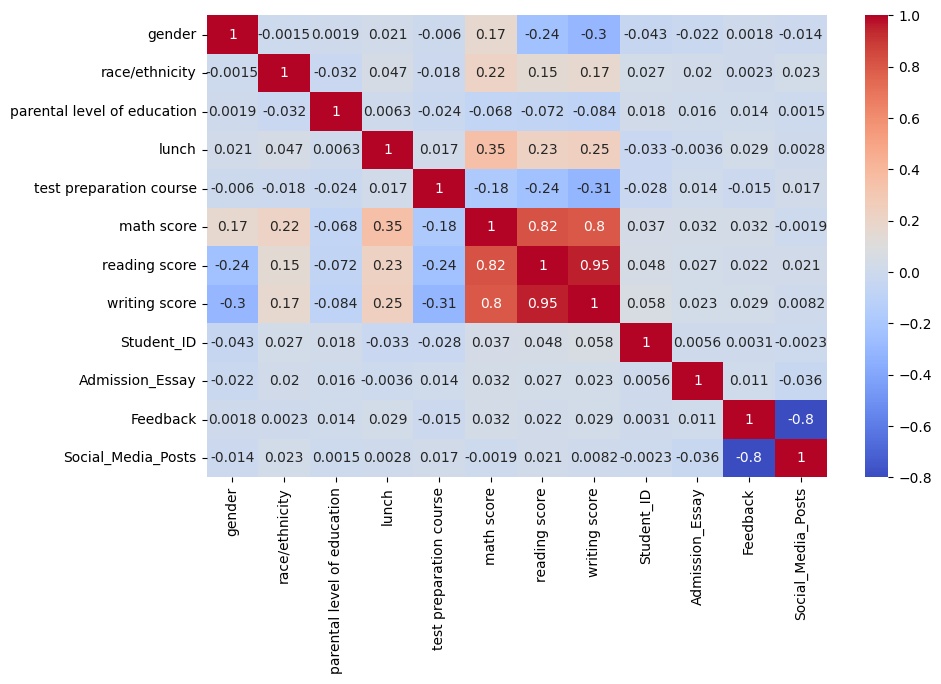

In [5]:
# Step 4: Data Exploratory Analysis

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [6]:
# Step 5: Feature Selection using PCA
X = data.drop('math score', axis=1)
y = data['math score']
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [17]:
X_pca

array([[-313.20014476, -412.16453786],
       [-191.07270276, -569.33832858],
       [-335.25023188, -379.99368058],
       ...,
       [ 421.91991189,  267.40717272],
       [ 420.94321951,  270.40858998],
       [ 644.77027921,  -19.20144093]])

/Users/ayushkumar/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log



In [7]:
# Step 6: Model Training and Testing
models = [
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    KNeighborsRegressor(),
    CatBoostRegressor(),
    AdaBoostRegressor(),
    XGBRegressor()
]

for model in models:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    print(f"{model.__class__.__name__} R2 Score: {model.score(X_test, y_test)}")

DecisionTreeRegressor R2 Score: 0.7418409918040063
LinearRegression R2 Score: 0.8832304517945594
Lasso R2 Score: 0.8361231582749159
KNeighborsRegressor R2 Score: 0.15667728562364192
Learning rate set to 0.039525
0:	learn: 14.6427695	total: 57.9ms	remaining: 57.9s
1:	learn: 14.2973660	total: 58.5ms	remaining: 29.2s
2:	learn: 13.9311509	total: 59ms	remaining: 19.6s
3:	learn: 13.5765160	total: 59.5ms	remaining: 14.8s
4:	learn: 13.2758878	total: 60ms	remaining: 11.9s
5:	learn: 12.9429788	total: 60.6ms	remaining: 10s
6:	learn: 12.6728054	total: 61.2ms	remaining: 8.68s
7:	learn: 12.3812965	total: 61.7ms	remaining: 7.64s
8:	learn: 12.1256437	total: 62.1ms	remaining: 6.84s
9:	learn: 11.8742731	total: 62.6ms	remaining: 6.2s
10:	learn: 11.6451082	total: 63.1ms	remaining: 5.68s
11:	learn: 11.3622621	total: 63.7ms	remaining: 5.24s
12:	learn: 11.1061505	total: 64.2ms	remaining: 4.87s
13:	learn: 10.8685740	total: 64.7ms	remaining: 4.55s
14:	learn: 10.6637979	total: 65.2ms	remaining: 4.28s
15:	learn:

In [8]:
# Step 7: NLP analysis on Feedback column

from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer

data= pd.read_csv("/Users/ayushkumar/Desktop/Python practice/sampledata.csv")

# Apply sentiment analysis to the 'Feedback' column
data['Feedback_Sentiment'] = data['Feedback'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Apply keyword extraction to the 'Admission_Essay' column
vectorizer = CountVectorizer(max_features=5, stop_words='english')
admission_essay_keywords = vectorizer.fit_transform(data['Admission_Essay']).toarray()
keywords_df = pd.DataFrame(admission_essay_keywords, columns=vectorizer.get_feature_names_out())

# Display the updated data and keywords
print(data[['Feedback', 'Feedback_Sentiment']])
print(keywords_df)


                                     Feedback  Feedback_Sentiment
0                           Excellent course!                 1.0
1               Great professor and material.                 0.8
2    Needs improvement in the grading system.                 0.0
3               Loved the practical projects.                 0.7
4                           Excellent course!                 1.0
..                                        ...                 ...
995             Loved the practical projects.                 0.7
996                         Excellent course!                 1.0
997             Great professor and material.                 0.8
998  Needs improvement in the grading system.                 0.0
999             Loved the practical projects.                 0.7

[1000 rows x 2 columns]
     career  goal  passion  research  study
0         4     1        0         2      4
1         3     3        1         4      1
2         1     1        2         4      5
3      

In [10]:
# Step 8: Selecting the Best Model

best_model = max(models, key=lambda model: model.score(X_test, y_test))
best_model

LinearRegression()

In [16]:
# Step 9: Creating the Dashboard using ExplainerDashboard

dashboard_mode= 'dash'

explainer = RegressionExplainer(best_model, X_test, y_test)
db = ExplainerDashboard(explainer, title="GenZ Marketplace Dashboard", mode=dashboard_mode)
db.run(port=8051)

Generating self.shap_explainer = shap.LinearExplainer(modelX)...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://192.168.1.109:8051
